In [1]:
import torch
import numpy as np

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from textdataset import TextDataset

### Model

In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
import torch.nn as nn

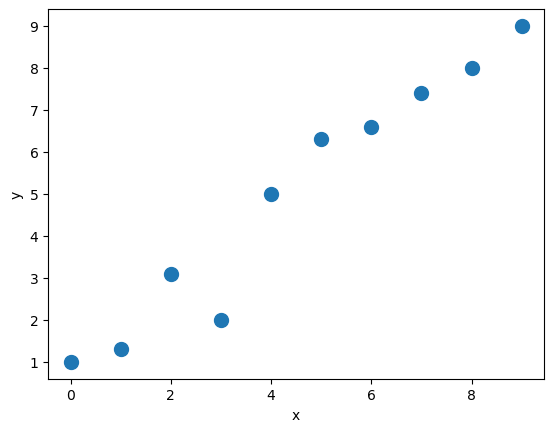

In [ ]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6,7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Standardizing features

In [ ]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Defining the model

In [ ]:
torch.manual_seed(1)

# defining weights and biases
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

# defining how the weights and biases are to be used
def model(xb):
    return xb @ weight + bias

# defining the loss function
def loss_fn(input, target):
    return (input - target).pow(2).mean()

### Building a Linear Regression Model

In [ ]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1502
Epoch 20 Loss 1.6446
Epoch 30 Loss 14.4571
Epoch 40 Loss 11.7827
Epoch 50 Loss 6.4122
Epoch 60 Loss 0.6339
Epoch 70 Loss 3.1562
Epoch 80 Loss 2.0100
Epoch 90 Loss 0.3107
Epoch 100 Loss 0.7625
Epoch 110 Loss 1.0024
Epoch 120 Loss 0.0232
Epoch 130 Loss 0.5138
Epoch 140 Loss 0.0741
Epoch 150 Loss 1.8712
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0850
Epoch 180 Loss 0.0634
Epoch 190 Loss 0.0012


Final Parameters: 2.670930862426758 4.88258695602417


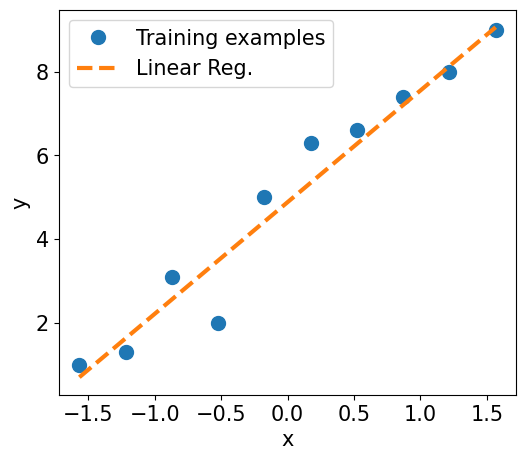

In [ ]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

In [ ]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

print('Final Parameters:', model.weight.item(), model.bias.item())

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764
Final Parameters: 2.6496422290802 4.87706995010376


### Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train) / np.std(X_train))
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

We set up the layers of the model, the dimensions, loss function and optimizer

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

training the model

In [ ]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()            # updates the gradients
        optimizer.zero_grad()       # resets the gradients of the model
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)                     # .item retrieves the value
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

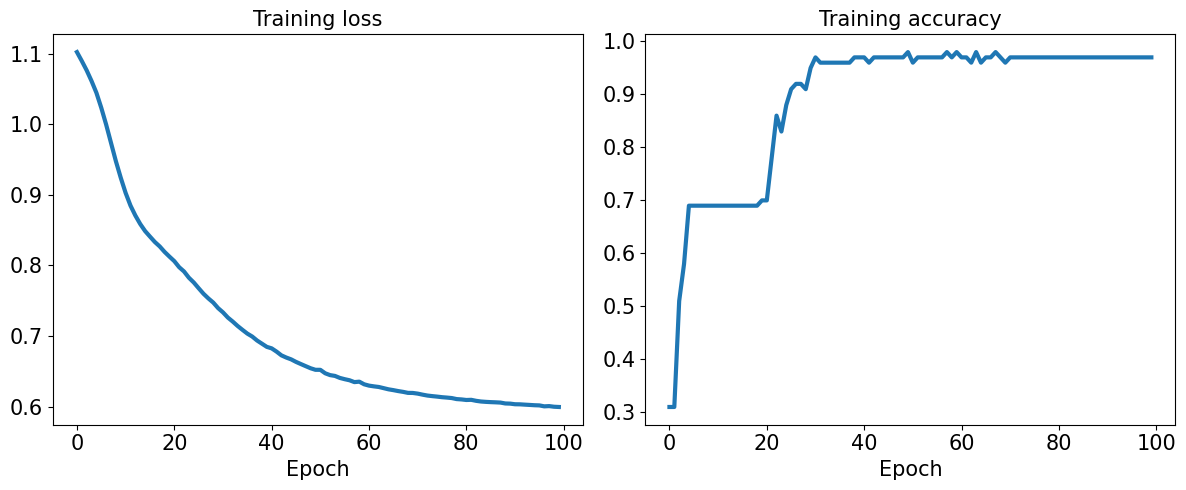

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

In [ ]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.5600


### Saving and reloading model

Creating tensors

In [4]:
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)

rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.6643, 0.0147, 0.8987],
        [0.5834, 0.8475, 0.0178]])


Manipulating shape and type of tensor

In [7]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

# transpose
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

# reshape
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

# remove unecessary dimensions
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)     # squeeze dimension 2
print(t.shape, ' --> ', t_sqz.shape)

torch.int64
torch.Size([3, 5])  -->  torch.Size([5, 3])
torch.Size([5, 6])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


Mathematical operations

In [9]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1                       # uniform dist
t2 = torch.normal(mean=0, std=1, size=(5, 2))       # standard normal

t3 = torch.multiply(t1, t2)                         # element-wise product
print(t3)

t4 = torch.mean(t1, axis=0)                         # mean along specified axis
print(t4)

t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))    # matrix-matrix product
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)    # other matrix product
print(t6)

norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)       # norm
print(norm_t1)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
tensor([-0.1373,  0.2028])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


Split, stack and concatenate tensors

In [12]:
torch.manual_seed(1)
# split 
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)           # number of tensors after split
print([item.numpy() for item in t_splits])


t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
print([item.numpy() for item in t_splits])
  

# concatenate
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

# stack 
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
[array([0.758, 0.279], dtype=float32), array([0.403, 0.735], dtype=float32), array([0.029, 0.8  ], dtype=float32)]
tensor([0.3971, 0.7544, 0.5695, 0.4388, 0.6387])
[array([0.397, 0.754, 0.57 ], dtype=float32), array([0.439, 0.639], dtype=float32)]
tensor([1., 1., 1., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


### DataLoader

In [18]:
from torch.utils.data import DataLoader, Dataset

In [16]:
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


Combine tensors into joint dataset

In [19]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

A custom Dataset class must have an init-method, which is where the logic happens (reding existing arrays, loading a file, filtering data) and a getitem-method which returns the corresponding sample for the given index

In [20]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [21]:
joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], ' y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


Shuffling data

In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0])